In [1]:
import tabula
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#df = tabula.read_pdf("Reportes/Tabla_casos_positivos_COVID-19_resultado_InDRE_2020.04.09.pdf")
#df.head()

df = tabula.read_pdf("Reportes/Tabla_casos_positivos_COVID-19_resultado_InDRE_2020.04.12.pdf",pages='all', multiple_tables=True)
# tabula.read_pdf("Reportes/Tabla_casos_positivos_COVID-19_resultado_InDRE_2020.04.09.pdf", area=(126,149,212,462), pages=1)
# df = tabula.read_pdf("Reportes/Tabla_casos_positivos_COVID-19_resultado_InDRE_2020.04.09.pdf", output_format="json")


In [3]:
#print(type(df))
#print(type(df[0]))
cantidad = len(df)
#print(df[0])
#df.shape
#df[0][0:3][0]
#print(df[:])
table = []
for x in range(cantidad):
    #if(x == 0):
    #    for y in range(len(df[x])):
    #        if y > 0:
    #            if type(df[x][0][y]) == str:
    #                lseparar = df[x][0][y].split(' ')
    #                record = [lseparar[0], ' '.join(lseparar[1:]), df[x][1][y], df[x][2][y], df[x][3][y], df[x][4][y]]
    #                table.append(record)
#    else:
        for y in range(len(df[x])):
            #data["Date"]= pd.to_datetime(data["Date"])
            record = [df[x][0][y], df[x][1][y], df[x][2][y], df[x][3][y], df[x][4][y], df[x][5][y]]
            table.append(record)
#    if x >= 1:
#        break
#print(table[1:])
nData = np.array(table[1:])

pData = pd.DataFrame(data=nData[0:,1:],
                  index=[nData[0:,0]],
                  columns=['CIUDAD','SEXO','EDAD','FECHA SINTOMAS','RT-PCR'])

In [4]:
pData["FECHA SINTOMAS"]= pd.to_datetime(pData["FECHA SINTOMAS"], format='%d/%m/%Y')
pData["EDAD"]= pd.to_numeric(pData["EDAD"])

In [5]:
pData.head()
#print(pData)

,CIUDAD,SEXO,EDAD,FECHA SINTOMAS,RT-PCR
1,MÉXICO,FEMENINO,75,2020-03-28,Confirmado
2,TAMAULIPAS,MASCULINO,22,2020-04-04,Confirmado
3,CIUDAD DE MÉXICO,MASCULINO,40,2020-03-17,Confirmado
4,CIUDAD DE MÉXICO,FEMENINO,29,2020-03-26,Confirmado
5,GUERRERO,FEMENINO,61,2020-04-06,Confirmado


                  count          
SEXO           FEMENINO MASCULINO
FECHA SINTOMAS                   
2020-02-17          NaN       2.0
2020-02-19          1.0       1.0
2020-02-21          NaN       1.0
2020-02-22          NaN       2.0
2020-02-23          1.0       1.0


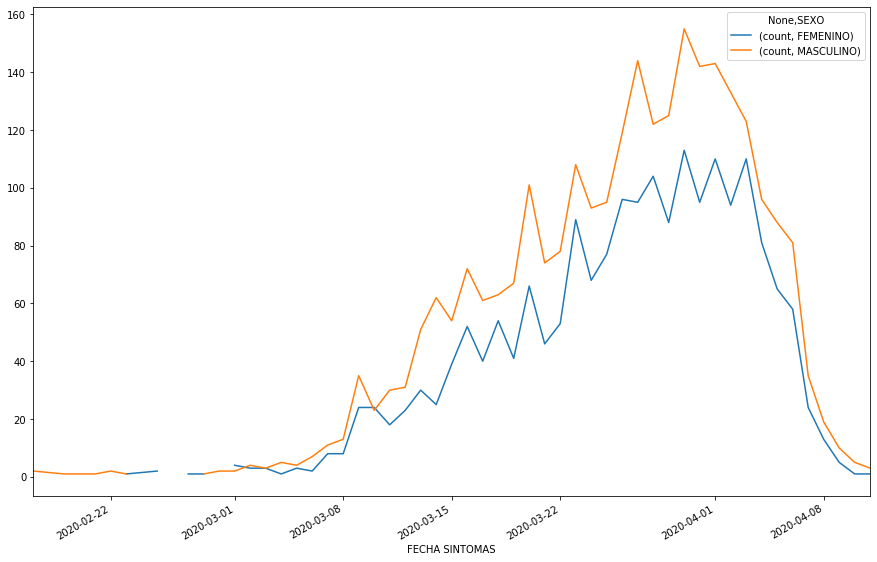

In [10]:
#print(pData)
#pData.grou
#print(pData.query('SEXO =="FEMENINO"'))
#print(pData.query('SEXO =="MASCULINO"'))

#pData2 = pData.groupby(['FECHA SINTOMAS','SEXO']).count()[['RT-PCR']]
pData2 = pData.groupby(['FECHA SINTOMAS','SEXO'])['RT-PCR'].agg(['count']).unstack(1)
print(pData2.head())

#print(pData2)
#pData2.pivot(index='RT-PCR', columns='RT-PCR', values='RT-PCR')
#index='FECHA SINTOMAS', , values='RT-PCR'
pData2.plot(kind='line', figsize=(15,10))

#fig, ax = plt.subplots()

#for key, grp in pData2.groupby(['SEXO']):
#    print(grp.head())
#    ax = grp.plot(ax=ax, kind='line')

#plt.legend(loc='best')
#plt.show()
#, x='RT-PCR', y='FECHA SINTOMAS', c=key, label=key

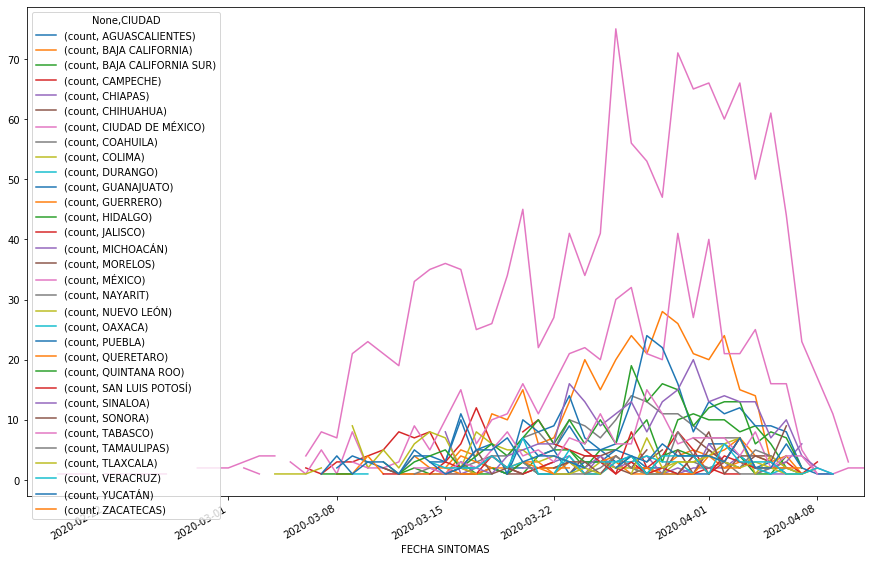

In [7]:
pData3 = pData.groupby(['FECHA SINTOMAS','CIUDAD'])['RT-PCR'].agg(['count']).unstack(1)
pData3.plot(kind='line', figsize=(15,10))

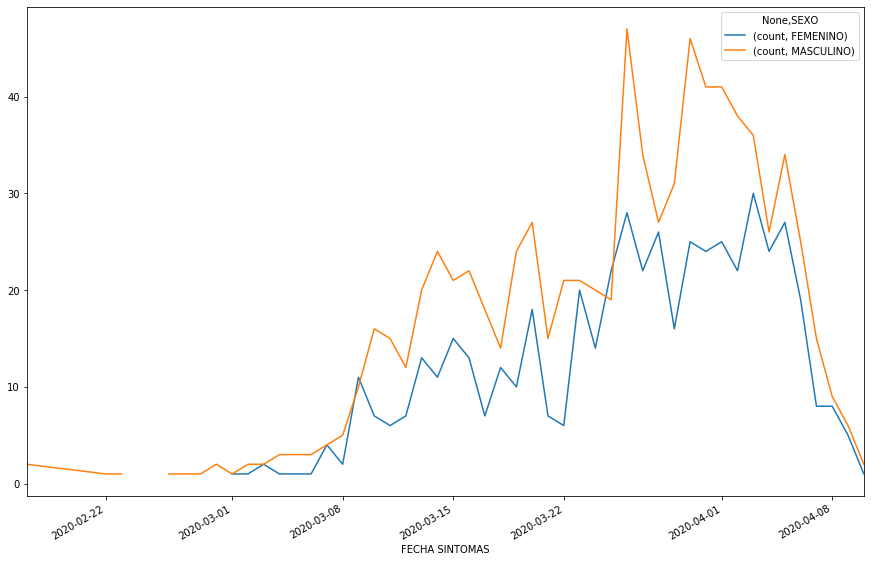

In [8]:
#print(pData.query('SEXO =="FEMENINO"'))
pData4 = pData.query('CIUDAD =="CIUDAD DE MÉXICO"')

pData4 = pData4.groupby(['FECHA SINTOMAS','SEXO'])['RT-PCR'].agg(['count']).unstack(1)
pData4.head()

pData4.plot(kind='line', figsize=(15,10))